# **PART 1.** 판다스 활용

## 0. 넘파이 맛보기

### 넘파이를 사용하는 이유

In [ ]:
import numpy as np

# 파이썬 리스트
data = [1,2,3,4,5]

# 모든 수에 2씩 곱하고 1을 더하려면
result = []
for i in data:
    result.append(i*2 +1)
print(result)

# 리스트 컴프리헨션
print([i*2 + 1 for i in data])

# map 함수 활용
print(list(map(lambda x: x*2+1, data)))

[3, 5, 7, 9, 11]
[3, 5, 7, 9, 11]
[3, 5, 7, 9, 11]


In [ ]:
ndata = np.array([1,2,3,4,5])
ndata

ndata * 2 + 1

array([ 3,  5,  7,  9, 11])

In [4]:
import time
import numpy as np

data_list = list(range(0, 10000))
data_array= np.array(data_list)

result = []
start = time.time()
for i in data_list:
    result.append(i*2 +1)
end = time.time()
list_time = end - start

start = time.time()
result = list(map(lambda x: x*2 + 1, data_list))
end = time.time()
map_time = end - start

start = time.time()
data_array = data_array * 2 + 1
end = time.time()
numpy_time = end - start

print(f"numpy: list {list_time/numpy_time}x, map {map_time/numpy_time}x")
# print(list_time / 1000, map_time / 1000, numpy_time / 1000)

numpy: list 31.182503770739064x, map 26.334841628959275x


In [ ]:
import sys

print(sys.getsizeof(result), "bytes")
print(sys.getsizeof(data_array), "bytes")

85176 bytes
80112 bytes


### 넘파이 배열 생성

In [ ]:
import numpy as np

#1.기본 배열 생성
arr = np.array([1, 2, 3, 4])
print(arr)

print()

#2. 0으로 채워진 배열 생성
zeros_arr = np.zeros(5)
print(zeros_arr)

print()

#3. 1로 채워진 배열 생성
ones_arr = np.ones(5)
print(ones_arr)

print()

#4. 특정 범위의 숫자로 배열 생성
range_arr = np.arange(0, 10, 2)  # 0부터 10 미만까지 2씩 증가하는 배열
print(range_arr)

print()

#5. 단위 행렬 생성
identity_matrix = np.eye(3)  # 3x3 단위 행렬
print(identity_matrix)

print()

#6. 무작위 값으로 채워진 배열 생성
random_arr = np.random.rand(5)  # 0과 1 사이의 무작위 값 5개를 갖는 배열
print(random_arr)

[1 2 3 4]

[0. 0. 0. 0. 0.]

[1. 1. 1. 1. 1.]

[0 2 4 6 8]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[0.47589314 0.14399128 0.27229531 0.04160809 0.93534996]


### 배열 정보 확인

In [ ]:
#배열의 차원
print(arr.ndim)
print(identity_matrix.ndim)
#배열의 형태
print(arr.shape)
print(identity_matrix.shape)
print(arr.dtype)    #배열의 데이터 타입
print(arr.size)     # 배열의 요소 수
print(len(arr))
print(identity_matrix.size)
print(len(identity_matrix)) # len은 가장 고차원의 배열 개수를 말하고, .size는 모든 차원의 원소 개수를 다 센다
print(arr.itemsize) # 각 요소의 바이트 크기, int64 = 64bit = 8byte
print(arr.nbytes)   # 배열의 전체 바이트 크기, 4 * size(int64)

1
2
(4,)
(3, 3)
int64
4
4
9
3
8
32


### 배열 형태 변경

In [ ]:
#배열의 형태 변경
a = np.arange(1,13)
b = np.arange(11,23)
print(a)
print(b)
print(a.shape)
ar = a.reshape(2,6)
print(ar)
br = b.reshape(2,6)
print(br)
cr = b.reshape(6,2)
print(cr)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[11 12 13 14 15 16 17 18 19 20 21 22]
(12,)
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[11 12 13 14 15 16]
 [17 18 19 20 21 22]]
[[11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]
 [21 22]]


### 배열 연산

In [ ]:
print(a * 2)
print(a / b)
print(ar * br)
print(np.matmul(ar, cr))
print(ar @ cr)

[ 2  4  6  8 10 12 14 16 18 20 22 24]
[0.09090909 0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5        0.52380952 0.54545455]
[[ 11  24  39  56  75  96]
 [119 144 171 200 231 264]]
[[ 371  392]
 [ 947 1004]]
[[ 371  392]
 [ 947 1004]]


## 1. 파일 읽어오기 : pd.read_xx(대상)

*   파일을 표형식(데이터프레임)으로 불러오는 기능을 제공한다.
*   다양한 파일 형식 지원 : csv, tab, json, xlsx, txt 등



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#라이브러러 가져오기
import pandas as pd

In [ ]:
#titanic_train.csv 파일 불러오기
#구글 드라이브 연동, 노트북에 직접 파일 업로드
df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv')
# df.head() # 앞 5행 출력하기
# df.tail() # 뒤 5행 출력하기
# df.info() # 데이터 정보(전체 데이터 수, 컬럼별 데이터 타입 등) 확인
# df.describe() # 수치 자료형 컬럼의 통계정보 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


### [ 연습하기 ]

In [ ]:
#1. movies_train.csv 파일 읽어보기
df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/movies_train.csv')

#2.맨 앞 데이터 5행 출력하기
print(df.head())

#3.맨 뒤 데이터 5행 출력하기
print(df.tail())

#4.데이터 정보 출력하기
print(df.info())

#5.컬럼별 통계 정보 확인하기
print(df.describe())

       title   distributor genre release_time  time screening_rat director  \
0     개들의 전쟁      롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가      조병옥   
1       내부자들        (주)쇼박스   느와르   2015-11-19   130      청소년 관람불가      우민호   
2  은밀하게 위대하게        (주)쇼박스    액션   2013-06-05   123       15세 관람가      장철수   
3   나는 공무원이다        (주)NEW   코미디   2012-07-12   101        전체 관람가      구자홍   
4       불량남녀  쇼박스(주)미디어플렉스   코미디   2010-11-04   108       15세 관람가      신근호   

   dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0             NaN             0         91          2        23398  
1      1161602.50             2        387          3      7072501  
2       220775.25             4        343          4      6959083  
3        23894.00             2         20          6       217866  
4            1.00             1        251          2       483387  
      title distributor genre release_time  time screening_rat director  \
595      해무      (주)NEW   드라마   2014-08-13

### iris.tab 파일을 read_csv 함수로 불러오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/iris.tab', delimiter='\t')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 엑셀 파일 불러오기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MLClass_류현승/data/country.xlsx')
df.head()

,Country Name,lat_min,lat_max,lon_min,lon_max,latitude,longitude
0,Aruba,12.170300,12.810300,-70.280984,-69.640984,12.490300,-69.960984
1,Afghanistan,29.377200,38.491068,60.517603,74.889862,33.934134,67.703733
2,Angola,-18.038945,-4.388063,11.460979,24.087886,-11.213504,17.774432
3,Anguilla,18.061545,18.795119,-63.639199,-62.712545,18.428332,-63.175872
4,Åland Islands,59.454158,60.876650,19.083210,21.345656,60.165404,20.214433


### 국가별 위도 경도 데이터  https://gist.github.com/tadast/8827699

In [ ]:
df = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")
df.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


##2. 데이터 추출하기

###2.0. 파일 불러오기

In [ ]:
#movies_train.csv 파일 불러오기

df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
#데이터 정보 확인하기
df.info()
df.describe()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


600

### 2.1. 인덱스, 컬럼명, 위치로 추출하기

In [ ]:
#데이터 프레임 정보 확인하기
df.index, df.shape, df.columns

(RangeIndex(start=0, stop=600, step=1),
 (600, 12),
 Index(['title', 'distributor', 'genre', 'release_time', 'time',
        'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
        'num_staff', 'num_actor', 'box_off_num'],
       dtype='object'))

In [ ]:
#컬럼명으로 데이터 가져오기 : Series 타입
df['title']

0         개들의 전쟁
1           내부자들
2      은밀하게 위대하게
3       나는 공무원이다
4           불량남녀
         ...    
595           해무
596         파파로티
597        살인의 강
598       악의 연대기
599          베를린
Name: title, Length: 600, dtype: object

In [ ]:
#인덱스 정보로 데이터 가져오기 : Series 타입
df.loc[0]

title                 개들의 전쟁
distributor         롯데엔터테인먼트
genre                     액션
release_time      2012-11-22
time                      96
screening_rat       청소년 관람불가
director                 조병옥
dir_prev_bfnum           NaN
dir_prev_num               0
num_staff                 91
num_actor                  2
box_off_num            23398
Name: 0, dtype: object

In [ ]:
# 특정 컬럼을 인덱스로 설정하기
# temp = df.set_index('title')
# temp.head()

In [ ]:
#위치 정보로 데이터 가져오기
df.iloc[0]
df.iloc[100, :3]

title            26년
distributor    인벤트 디
genre             액션
Name: 100, dtype: object

In [ ]:
#필요한 컬럼들만 가져오기
df[['title','genre']]

,title,genre
0,개들의 전쟁,액션
1,내부자들,느와르
2,은밀하게 위대하게,액션
3,나는 공무원이다,코미디
4,불량남녀,코미디
...,...,...
595,해무,드라마
596,파파로티,드라마
597,살인의 강,공포
598,악의 연대기,느와르


#### [ 연습하기 ]

##### 1. df 데이터 프레임의 인덱스가 100인 데이터 가져오기

In [ ]:
df.loc[100]

title                    26년
distributor            인벤트 디
genre                     액션
release_time      2012-11-29
time                     135
screening_rat        15세 관람가
director                 조근현
dir_prev_bfnum     2636385.0
dir_prev_num               1
num_staff                365
num_actor                  3
box_off_num          2963652
Name: 100, dtype: object

##### 2. df 데이터 프레임의 인덱스가 100,200,300,500인 데이터 가져오기

In [ ]:
df.loc[100::100]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
100,26년,인벤트 디,액션,2012-11-29,135,15세 관람가,조근현,2636385.0,1,365,3,2963652
200,돌연변이,필라멘트 픽쳐스,드라마,2015-10-22,93,12세 관람가,권오광,NaN,0,282,3,100543
300,오직 그대만,(주)쇼박스,멜로/로맨스,2011-10-20,105,15세 관람가,송일곤,8235.0,2,110,2,1027782
400,돈의 맛,시너지,드라마,2012-05-17,115,청소년 관람불가,임상수,1276480.0,2,324,4,1166025
500,한양 기방 춘향뎐,(주) 케이알씨지,멜로/로맨스,2015-11-25,89,청소년 관람불가,김민욱,NaN,0,0,1,400


##### 3. df 프레임에서 인덱스가 100~200 인 'title', 'genre' 컬럼 데이터 가져오기

In [ ]:
df.loc[100:200][['title', 'genre']]

,title,genre
100,26년,액션
101,관상,드라마
102,비념,다큐멘터리
103,퇴마: 무녀굴,공포
104,풍산개,드라마
...,...,...
196,사토미를 찾아라,코미디
197,만신,다큐멘터리
198,18: 우리들의 성장 느와르,느와르
199,시티 오브 크레인,드라마


##### 4. df 데이터 프레임의 마지막 컬럼 'box_off_num' 컬럼을 제외한 모든 데이터를 X 변수에 저장하기

In [ ]:
X = df.iloc[:, :-1]
X

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2
...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4


##### 5.df 데이터 프레임의 'box_off_num' 컬럼 데이터를 Y 변수에 저장하기

In [ ]:
Y = df['box_off_num']
Y

0        23398
1      7072501
2      6959083
3       217866
4       483387
        ...   
595    1475091
596    1716438
597       2475
598    2192525
599    7166532
Name: box_off_num, Length: 600, dtype: int64

##### 6.df 데이터 전체 개수를 8:2로 나누면 각각 몇 개인지 계산하기

In [ ]:
tmp = len(df) // 10 * 8
ratio = (tmp, len(df) - tmp)
ratio

(480, 120)

#####7.X, Y 데이터를 8:2 비율로 나누어 trainX, testX, trainY, testY 로 나누기

In [ ]:
trainX, testX = X[:ratio[0]], X[ratio[0]:]
trainY, testY = Y[:ratio[0]], Y[ratio[0]:]

##### 예시 코드

In [ ]:
#1. df 데이터 프레임의 인덱스가 100,200,300,500인 데이터 가져오기
df.iloc[100::100, :]
df.loc[100:200,['title','genre']]
# df.iloc[100:101]
# #2. df 데이터 프레임의 마지막 컬럼 'box_off_num' 컬럼을 제외한 모든 데이터를 X 변수에 저장하기
# #3. df 데이터 프레임의 'box_off_num' 컬럼 데이터를 Y 변수에 저장하기
# X = df.iloc[:,:-1]
# X.head()
# Y = df.iloc[:,-1]
# Y
# #4.df 데이터 전체 개수를 8:2로 나누면 각각 몇 개인지 계산하기

# #5. X, Y 데이터를 8:2 비율로 나누어 trainX, testX, trainY, testY 로 나누기
# sep = int(len(df) * 0.8)
# print(sep)

,title,genre
100,26년,액션
101,관상,드라마
102,비념,다큐멘터리
103,퇴마: 무녀굴,공포
104,풍산개,드라마
...,...,...
196,사토미를 찾아라,코미디
197,만신,다큐멘터리
198,18: 우리들의 성장 느와르,느와르
199,시티 오브 크레인,드라마


### 2.2. 조건으로 추출하기

In [ ]:
# 'genre'가 '액션'인지 아닌지 조건 검사하기
df['genre'] == '액션'

0       True
1      False
2       True
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599     True
Name: genre, Length: 600, dtype: bool

In [ ]:
# 조건에 맞는 데이터 추출하기
condition = df['genre'] == '액션'
df[condition]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4,343,4,6959083
7,회사원,(주)쇼박스,액션,2012-10-11,96,청소년 관람불가,임상윤,7.395220e+05,3,342,2,1110523
48,빅매치,(주)NEW,액션,2014-11-26,112,15세 관람가,최호,1.159954e+06,2,600,4,1177435
74,아저씨,CJ 엔터테인먼트,액션,2010-08-04,119,청소년 관람불가,이정범,NaN,0,509,2,6178665
91,무적자,CJ 엔터테인먼트,액션,2010-09-16,124,15세 관람가,송해성,1.163526e+06,3,546,4,1546132
96,잉투기,무비꼴라쥬,액션,2013-11-14,98,15세 관람가,엄태화,NaN,0,65,3,17341
100,26년,인벤트 디,액션,2012-11-29,135,15세 관람가,조근현,2.636385e+06,1,365,3,2963652
139,고지전,(주)쇼박스,액션,2011-07-20,133,15세 관람가,장훈,2.266504e+06,3,238,11,2945151
179,응징자,인벤트 디,액션,2013-10-30,103,청소년 관람불가,신재호,4.444850e+04,2,151,3,192347


In [ ]:
#조건이 여러 개 일때
conditions = (df['genre'] == '코미디') & (df['screening_rat'] == '전체 관람가')
df[conditions]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
50,황구,골든타이드픽처스,코미디,2014-10-16,87,전체 관람가,박용집,695201.5,2,140,3,72
565,도쿄 택시,(주)키노아이,코미디,2010-05-20,75,전체 관람가,김태식,NaN,0,80,3,6034


In [ ]:
#결측치 조건 여부 확인 isnull(), notnull()
condition = df['dir_prev_bfnum'].isnull()
df[condition]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [ ]:
#'dir_prev_bfnum' 컬럼의 널값(NaN)의 개수 확인하기
df['dir_prev_bfnum'].isnull().sum()

330

### 2.3. 특정 컬럼을 기준으로 데이터 정보 추출하기

In [ ]:
#특정 컬럼의 고유 데이터
df['genre'].unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [ ]:
#특정 컬럼 기준 데이터 개수
df['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [ ]:
#'genre' 컬럼을 기준으로 수치 데이터 합계, 평균 등 확인하기
df.groupby('genre').mean()

<ipython-input-166-8a7cecc4e1d7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genre').mean()


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
genre,,,,,,
SF,101.384615,1.788537e+06,1.307692,197.307692,3.692308,1.788346e+06
공포,100.214286,1.079739e+06,1.095238,176.380952,3.880952,5.908325e+05
느와르,115.370370,1.101198e+06,1.296296,311.074074,3.592593,2.263695e+06
다큐멘터리,88.053763,2.047492e+05,0.397849,17.849462,3.268817,6.717226e+04
드라마,104.651584,8.457249e+05,0.814480,164.484163,3.647059,6.256898e+05
멜로/로맨스,96.641026,1.200881e+06,0.987179,135.782051,3.410256,4.259680e+05
뮤지컬,107.000000,NaN,0.000000,2.200000,2.800000,6.627000e+03
미스터리,102.588235,9.025298e+05,1.235294,117.352941,2.882353,5.275482e+05
서스펜스,112.000000,5.342325e+05,1.000000,111.000000,3.000000,8.261100e+04


In [ ]:
#특정 컬럼을 기준으로 정렬하기 'box_off_num'기준으로
df.sort_values(by=['box_off_num'], ascending=False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
...,...,...,...,...,...,...,...,...,...,...,...,...
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,NaN,0,1,2,36
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,NaN,0,0,3,10
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,1.761531e+07,1,27,3,8
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,NaN,0,3,4,2


#### [ 연습하기 ]

##### 1.num_actor의 수가 5보다 큰 데이터 추출하기

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.0,1,572,11,7453715
19,하하하,스폰지,드라마,2010-05-05,115,청소년 관람불가,홍상수,NaN,0,74,9,57029
26,이웃집 좀비,인디스토리,공포,2010-02-18,89,15세 관람가,류훈,NaN,0,40,10,2807
30,로맨틱 헤븐,시네마서비스,드라마,2011-03-24,117,12세 관람가,장진,NaN,0,369,7,73729
...,...,...,...,...,...,...,...,...,...,...,...,...
580,정글히어로,CJ 엔터테인먼트,애니메이션,2014-10-02,82,전체 관람가,박태동,NaN,0,0,6,72052
582,뽀로로 극장판 컴퓨터 왕국 대모험,(주)NEW,애니메이션,2015-12-10,62,전체 관람가,박영균,NaN,0,2,8,446054
584,페스티발,시너지,코미디,2010-11-18,109,청소년 관람불가,이해영,475388.0,3,420,7,196995
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091


#####2. 'dir_prev_bfnum'에 결측치가 없는 데이터 추출하기

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1.161602e+06,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,2.207752e+05,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,2.389400e+04,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.000000e+00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,8.379690e+05,2,262,4,233211
...,...,...,...,...,...,...,...,...,...,...,...,...
587,서유기 리턴즈,(주) 영화사조제,SF,2011-02-17,79,전체 관람가,신재호,6.760200e+04,1,220,4,12696
588,하울링,CJ 엔터테인먼트,느와르,2012-02-16,114,15세 관람가,유하,2.061297e+06,3,288,2,1612554
592,차이나타운,CGV아트하우스,느와르,2015-04-29,110,청소년 관람불가,한준희,5.974970e+05,3,420,3,1472147
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3.833000e+03,1,510,7,1475091


#####3. 'time'이 가장 긴 영화 제목 추출하기

'내부자들: 디 오리지널'

#####4.'screening_rat', 'genre'기준으로 상영시간(time), 관람객수(box_off_num) 평균을 출력하시오.

<ipython-input-171-db16575a9b5f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['screening_rat','genre']).mean()[['time','box_off_num']]


time   box_off_num
screening_rat genre                           
12세 관람가       SF      101.666667  2.890362e+06
              공포       98.000000  1.079000e+03
              다큐멘터리    90.913043  1.570848e+04
              드라마     105.560000  8.817048e+05
              멜로/로맨스  107.300000  1.355579e+06
              뮤지컬     100.000000  3.089000e+03
              애니메이션    74.333333  1.318667e+04
              액션      112.000000  6.090630e+05
              코미디     107.800000  1.886185e+06
15세 관람가       SF      112.166667  2.426946e+06
              공포       99.736842  8.374626e+05
              느와르     113.888889  3.329025e+06
              다큐멘터리    89.882353  9.840706e+03
              드라마     107.526316  9.639021e+05
              멜로/로맨스  106.952381  7.779760e+05
              미스터리    106.111111  9.947390e+05
              애니메이션    83.000000  8.100000e+01
              액션      119.187500  3.070357e+06
              코미디     111.321429  1.561581e+06
전체 관람가        SF       79.000000  1.269600e+04
              다큐멘터리    85.923077  1.099162e+05
              드라마     104.411765  1.581542e+05
              멜로/로맨스   85.000000  2.008100e+04
              뮤지컬     108.750000  7.511500e+03
              애니메이션    82.928571  2.670129e+05
              코미디      87.666667  7.465733e+04
청소년 관람불가      SF       87.000000  1.011333e+03
              공포      100.727273  4.046408e+05
              느와르     116.111111  1.731030e+06
              다큐멘터리   102.000000  2.788000e+03
              드라마     101.320513  2.339362e+05
              멜로/로맨스   89.869565  7.200307e+04
              미스터리     98.625000  1.958500e+03
              서스펜스    112.000000  8.261100e+04
              애니메이션    89.000000  1.421300e+04
              액션      107.818182  1.088772e+06
              코미디      93.416667  3.894500e+04

## 3.데이터 변경하기

In [ ]:
import pandas as pd
#타이타닉 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv')
df.head()
# df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.1. 특정 행, 열 삭제하기

In [ ]:
#'Ticket'컬럼 삭제하기
del df['Ticket']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [ ]:
#인덱스로 행 삭제하기
temp = df.drop([0, 1], axis=0)
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S


In [ ]:
df.drop([0, 1], axis=0, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S


In [ ]:
#결측치가 있는 데이터 삭제하기
temp = df.dropna()
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 3 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  182 non-null    int64  
 1   Survived     182 non-null    int64  
 2   Pclass       182 non-null    int64  
 3   Name         182 non-null    object 
 4   Sex          182 non-null    object 
 5   Age          182 non-null    float64
 6   SibSp        182 non-null    int64  
 7   Parch        182 non-null    int64  
 8   Fare         182 non-null    float64
 9   Cabin        182 non-null    object 
 10  Embarked     182 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.1+ KB


###3.2.결측치 채우기

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#'Age' 컬럼 결측치 개수 확인하기
df['Age'].isnull().sum()
#'Age' 컬럼의 평균값 구하기
df['Age'].mean()
#'Age'컬럼의 결측치를 평균값으로 채우기
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].isnull().sum()

0

In [ ]:
#'Embark'컬럼 결측치 개수 확인하기
df['Embarked'].isnull().sum()
#'Embark' 컬럼의 값 분포 확인하기
df.Embarked.value_counts()
# #결측치를 최빈값으로 채우기
df.Embarked.fillna('S',inplace=True)
df.Embarked.isnull().sum()

0

### 3.3.특정 컬럼의 값을 일괄적으로 변경하기

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv")
df[df['Age'].notnull() & df['Age'] % 1 != 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,NaN,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,E101,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,F2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,NaN,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C


In [ ]:
#'Sex'컬럼을 범주형 데이터 타입으로 변환
print(df['Sex'].dtype)
df['Sex'] = df['Sex'].astype('category')
df.info()

object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


In [ ]:
# 'Age'컬럼을 구간으로 변경하기
print(df['Age'].min(), df['Age'].max(), df['Age'].median())
# 10대, 20대, 30대, 40대, 50대 이상으로 구분하기
# 적용할 함수 정의하기
def convertAge(age):
    if age < 20: return '10대'
    elif age < 30 : return '20대'
    elif age < 40 : return '30대'
    elif age < 50 : return '40대'
    else : return '50대이상'

df['Age'] = df['Age'].apply(convertAge)
df['Age'].unique()

0.42 80.0 29.69911764705882


array(['20대', '30대', '50대이상', '10대', '40대'], dtype=object)

### 3.4. 새로운 컬럼 추가하기

In [ ]:
df['Title']

KeyError: ignored

In [ ]:
#'Name' 컬럼에서 데이터를 추출하여 'Title' 컬럼 추가하기
# 적용할 함수 정의하기
def convertName(name):
    result = name.split(',')[1].split('.')[0].strip()
    return result

df['Title'] = df['Name'].apply(convertName)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,20대,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30대,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,20대,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30대,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,30대,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
df['Title'].unique()
#Tile의 범주를 줄이기 위한 딕셔너리
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [ ]:
#'Title' 컬럼에 Title_Dictionary 맵으로 변환하기
df['Title'] = df['Title'].map(Title_Dictionary)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

###연습하기

##### 1. 'Sex'컬럼을 male -> 1, female -> 0 으로 변환하기

In [ ]:
def transform(value):
  if value == "male":
    return 1
  elif value == "female":
    return 0

df['Sex'] = df['Sex'].apply(transform)
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: category
Categories (2, int64): [0, 1]

##### 2. 'Parch', 'SibSp' 컬럼으로 'FamilySize' 컬럼 만들기
* SipSp는 배우자나 형제 자매 명 수의 총 합,Parch는 부모 자식 명 수의 총 합을 나타냄. FamilySize = Parch의 수 + SibSp의 수 + 1 로 계산한다고 가정함.

In [ ]:
df.Parch

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [ ]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [ ]:
df["FamilySize"].max()

11

##### 3. FamilySize 값을 'Single'(1인),'Small'(2인이상 5임 미만), 'Large'(5인 이상) 카테고리로 변환하기

In [ ]:
def get_size(value):
  if value == 1:
    return 'Single'
  elif 2 <= value < 5:
    return 'Small'
  elif value >= 5:
    return 'Large'


df['FamilySize'] = df['FamilySize'].apply(get_size)
df['FamilySize'] = df['FamilySize'].astype('category')
df['FamilySize'].unique()

['Small', 'Single', 'Large']
Categories (3, object): ['Large', 'Single', 'Small']

In [ ]:
df[df['FamilySize'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize


## 4. 데이터 프레임 합치기

###4.1. 데이터 프레임 붙이기  pd.concat([...], axis=0, join="outer")


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#titanic_train.csv, titanic_test.csv 파일 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#train_df의 'Survived' 컬럼 삭제
# del train_df['Survived']
# train_df.columns, test_df.columns
#2개의 데이터 프레임을 행단위로 병합하기
data = pd.concat([train_df, test_df])
data.shape

(1309, 11)

In [ ]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


1305번 승객이 413 인덱스라는 것은 concat의 결과물이 인덱스마저 보존한채로 뒤에 dataframe을 이어붙였다는 것을 의미한다.  
index: (0, 1, 2, 3, 4, ..., 891, 0, 1, 2, 3, ..., 417)

In [ ]:
#reset_index(), ignore_index

In [ ]:
#titanic_train.csv, titanic_test.csv 파일 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/titanic_test.csv')

- axis가 0이면 "행렬"[0]가 '행' 이니까 행axis를 의미한다. 즉 행을 추가하며 아래로 붙는다.
- join='outer'
  - join이 'inner'면 합칠 데이터 프레임 중 최소 컬럼을 따른다. (나머지는 삭제)
  - join이 'outer'면 합칠 데이터 프레임 중 최대 컬럼을 따른다. (나머지는 nan)
- ignore_index가 True면 기존 인덱스를 보존하지 않는다.

In [ ]:
data = pd.concat([train_df, test_df], axis=0, join='inner', ignore_index=True)
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


###4.2. 데이터 프레임 병합하기 : pd.merge(df1, df2, how="inner", on=None)

In [ ]:
#HDI 파일 읽어오기
hdi = pd.read_csv('/content/drive/MyDrive/MLClass_류현승/data/HDI.tab', delimiter='\t')
hdi.head()

,Life expectancy,Mean years of schooling,Gross national income (GNI) per capita,Gender Development Index value,Mean years of schooling Female,Mean years of schooling Male,Estimated gross national income per capita Female,Estimated gross national income per capita Male,Share of seats in parliament (% held by women),Population with at least some secondary education % (2005-2015) Female,...,Internet users (% 2010 -2015),Coefficient of human inequality,Inequality in life expectancy (%) 2010-2015,Inequality-adjusted life expectancy index,Child labour (% ages 5-14) 2009-2015,Inequality in education(%),Inequality in income (%),Mandatory paid maternity leave (days),Country,HDI
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,string,continuous
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,meta,meta
2,81.7,12.7,67614.0,0.993,12.8,12.7,59800.0,75314.0,39.6,96.1,...,-0.800000012,5.4,3.3,0.918,NaN,2.4,10.4,NaN,Norway,0.949
3,82.5,13.2,42822.0,0.978,13.4,13.0,34271.0,51386.0,30.5,91.4,...,32.20000076,8.0,4.3,0.921,NaN,1.9,17.7,NaN,Australia,0.939
4,83.1,13.4,56364.0,0.974,13.3,13.5,46798.0,66116.0,28.9,96.1,...,15.30000019,8.4,3.8,0.934,NaN,5.7,15.7,98.0,Switzerland,0.939


In [ ]:
#불필요한 행 삭제하기
hdi.drop([0,1], axis=0, inplace=True)
hdi.head()
df1 = hdi[['Country','HDI']]
df1.head()

,Country,HDI
2,Norway,0.949
3,Australia,0.939
4,Switzerland,0.939
5,Germany,0.926
6,Denmark,0.925


In [ ]:
#나라별 위도 경도 데이터 불러오기
location = df = pd.read_excel('/content/drive/MyDrive/MLClass_류현승/data/country.xlsx')
location.head()
df2 = location[['Country Name','latitude','longitude']]
df2.head()

,Country Name,latitude,longitude
0,Aruba,12.490300,-69.960984
1,Afghanistan,33.934134,67.703733
2,Angola,-11.213504,17.774432
3,Anguilla,18.428332,-63.175872
4,Åland Islands,60.165404,20.214433


df1의 `Country` 컬럼과 df2의 `Country Name` 컬럼을 기준으로 열방향으로 병합하는 코드. `how` 는 어느 쪽 데이터프레임을 기준으로 병합할 것인지를 뜻한다.

In [ ]:
merge_data = pd.merge(df1, df2, how='left', left_on="Country", right_on="Country Name" )
merge_data.head()

,Country,HDI,Country Name,latitude,longitude
0,Norway,0.949,Norway,64.571942,17.924509
1,Australia,0.939,Australia,-32.205523,120.235524
2,Switzerland,0.939,Switzerland,46.813230,8.224103
3,Germany,0.926,Germany,51.184636,10.454124
4,Denmark,0.925,Denmark,56.202048,11.634195


In [ ]:
#Country 'Korea' 행 추출하기
condition = merge_data['Country'] == 'Korea'
merge_data[condition]

,Country,HDI,Country Name,latitude,longitude
17,Korea,0.901,NaN,NaN,NaN


In [ ]:
#location에서 누락된 나라가 있을까?
set(df1['Country'].unique())-set(df2['Country Name'].unique())

{'Antigua and Barb.',
 'Bolivia',
 'Bosnia and Herz.',
 'Cabo Verde',
 'Czechia',
 'Dem. Rep. Congo',
 'Dominican Rep.',
 'Iran',
 'Korea',
 'Libya',
 'Macedonia',
 'Micronesia',
 'Moldova',
 'Palestine, State of',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Vin. and Gren.',
 'São Tomé and Principe',
 'Tanzania',
 'Venezuela'}

In [ ]:
set(df2['Country Name'].unique()) - set(df1['Country'].unique())

{'American Samoa',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Aruba',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Cape Verde',
 'Cayman Islands',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Congo, the Democratic Republic of the',
 'Cook Islands',
 'Czech Republic',
 'Dominican Republic',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Guiana',
 'French Polynesia',
 'French Southern Territories',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guernsey',
 'Heard Island and McDonald Islands',
 'Holy See (Vatican City State)',
 'Iran, Islamic Republic of',
 'Isle of Man',
 'Jersey',
 "Korea, Democratic People's Republic of",
 'Korea, Republic of',
 'Libyan Arab Jamahiriya',
 'Macao',
 'Macedonia, the former Yugoslav Republic of',
 'Marshall Islands',
 'Martinique',
 'Mayotte',
 'Micronesia, Federated States of',
 'Moldova, Republic of',
 'Monaco',
 'Montserrat',
 'Nauru

In [ ]:
merge_data['score'] = merge_data['HDI'].astype('float')*10
merge_data.head()

,Country,HDI,Country Name,latitude,longitude,score
0,Norway,0.949,Norway,64.571942,17.924509,9.49
1,Australia,0.939,Australia,-32.205523,120.235524,9.39
2,Switzerland,0.939,Switzerland,46.813230,8.224103,9.39
3,Germany,0.926,Germany,51.184636,10.454124,9.26
4,Denmark,0.925,Denmark,56.202048,11.634195,9.25


##### 그래프 예시

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#설치 후 런타임 재시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,735 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


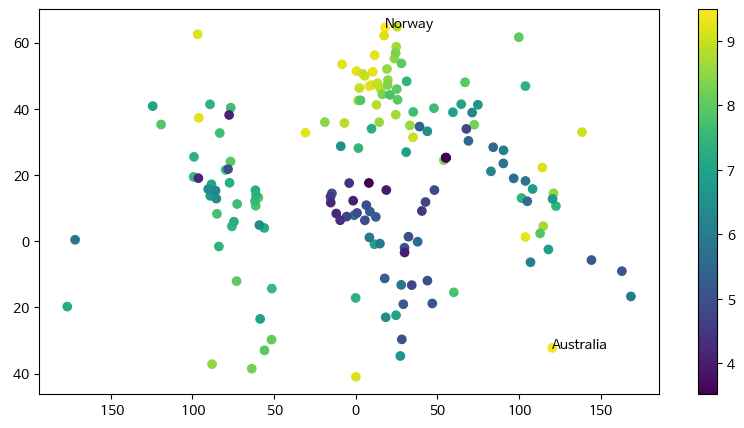

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10,5))
plt.scatter(merge_data['longitude'], merge_data['latitude'], c=merge_data['score'])
plt.text(merge_data['longitude'][0], merge_data['latitude'][0],'Norway')
plt.text(merge_data['longitude'][1], merge_data['latitude'][1],'Australia')
plt.colorbar()
plt.show()

# **PART 2.** 시각화 라이브러리 활용

### 그래프 한글 깨짐 문제 해결

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#설치 후 런타임 재시작

In [ ]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

# print(font_manager.fontManager.ttflist)
plt.rc('font', family='NanumBarunGothic')
plt.title('한글 제목')
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

##1. 시각화 라이브러리 기초

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* x, y 축 데이터 준비하기
* $f1(x) =5x+3, f2(x)=(x-4)*x*(x+4)$



In [ ]:
#x 데이터 만들기
x = np.arange(-5, 6, 0.5)
f1 = 3 * x + 5
f2 = (x-4)*x*(x+4)
f3 = 2*np.sin(x)

* 라인 그래프 그리기

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


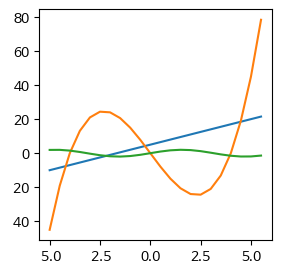

In [ ]:
plt.figure(figsize=(3,3))
plt.plot(x,f1)
plt.plot(x,f2)
plt.plot(x,f3)
plt.show()

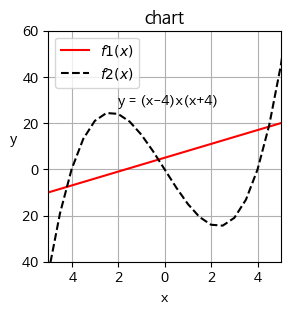

In [ ]:
#그래프 크기 지정
plt.figure(figsize=(3,3))
# 그래프 색상, 라벨, 라인스타일 지정
plt.plot(x,f1, color='red', label='$f1(x)$')
plt.plot(x,f2, color='black', label='$f2(x)$', ls='--')
# 그래프 범례표시
plt.legend(loc="upper left")
# 그래프 표현범위 조정
plt.ylim(-40,60)
plt.xlim(-5,5)
# 그래프 제목 - 한글처리 별도해야함
plt.title("chart")
# x축 이름 표시
plt.xlabel('x')
# y축 이름 표시
plt.ylabel('y', rotation='horizontal')
# 격자표시
plt.grid(True)
# 그래프에 텍스트 추가
plt.text(-2, 28, 'y = (x-4)x(x+4)')
plt.show()

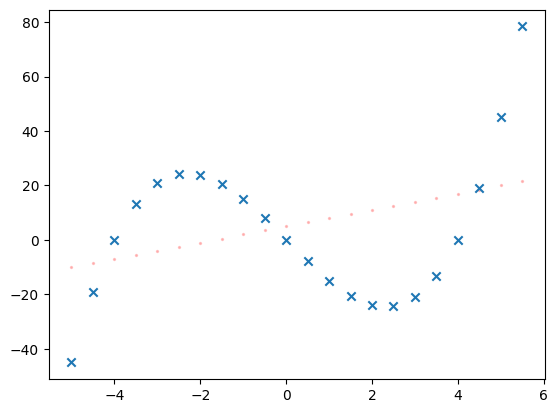

In [ ]:
#두 변수 간의 관계를 나타내는 산점도를 생성하기
plt.scatter(x, f1, c='red', s=2, alpha=0.2, marker='o')
plt.scatter(x, f2, marker='x')

* 여러 개의 그래프 그리기

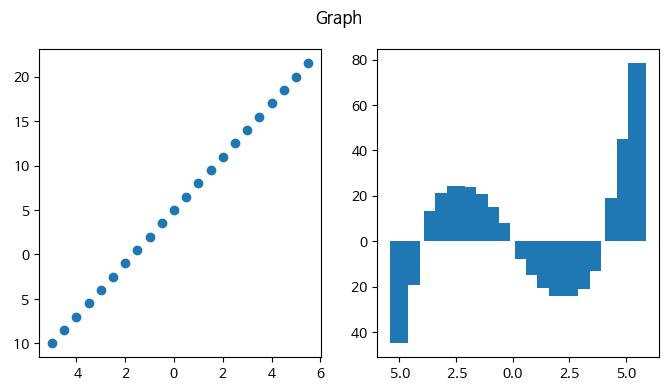

In [ ]:
plt.figure(1, figsize=(8,4))
plt.subplot(121)
plt.scatter(x, f1)
plt.subplot(122)
plt.bar(x, f2)
plt.suptitle('Graph')
plt.show()

* 2차원 배열 시각화

In [ ]:
#2차원 배열 값 생성하기

def f3(x0, x1):
    r = 2*x0**2 + x1**2
    result = r*np.exp(-r)
    return result

x0 = np.linspace(-2,2,9)
x1 = np.linspace(-2,2,9)
y = np.zeros((len(x0), len(x1)))

for row_index in range(9):
    for col_index in range(9):
        y[col_index, row_index] = f3(x0[row_index], x1[col_index])

In [ ]:
print(y)
np.round(y,1) #소수 둘째자리에서 반올림

[[7.37305482e-05 1.72948114e-03 1.48725131e-02 4.99904844e-02
  7.32625556e-02 4.99904844e-02 1.48725131e-02 1.72948114e-03
  7.37305482e-05]
 [3.62414384e-04 7.90343744e-03 6.06229941e-02 1.75801618e-01
  2.37148255e-01 1.75801618e-01 6.06229941e-02 7.90343744e-03
  3.62414384e-04]
 [1.11068824e-03 2.24772429e-02 1.49361205e-01 3.34695240e-01
  3.67879441e-01 3.34695240e-01 1.49361205e-01 2.24772429e-02
  1.11068824e-03]
 [2.15538310e-03 4.10955522e-02 2.37148255e-01 3.54274915e-01
  1.94700196e-01 3.54274915e-01 2.37148255e-01 4.10955522e-02
  2.15538310e-03]
 [2.68370102e-03 4.99904844e-02 2.70670566e-01 3.03265330e-01
  0.00000000e+00 3.03265330e-01 2.70670566e-01 4.99904844e-02
  2.68370102e-03]
 [2.15538310e-03 4.10955522e-02 2.37148255e-01 3.54274915e-01
  1.94700196e-01 3.54274915e-01 2.37148255e-01 4.10955522e-02
  2.15538310e-03]
 [1.11068824e-03 2.24772429e-02 1.49361205e-01 3.34695240e-01
  3.67879441e-01 3.34695240e-01 1.49361205e-01 2.24772429e-02
  1.11068824e-03]
 [3.62

array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.2, 0.2, 0.2, 0.1, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.4, 0.3, 0.1, 0. , 0. ],
       [0. , 0. , 0.2, 0.4, 0.2, 0.4, 0.2, 0. , 0. ],
       [0. , 0. , 0.3, 0.3, 0. , 0.3, 0.3, 0. , 0. ],
       [0. , 0. , 0.2, 0.4, 0.2, 0.4, 0.2, 0. , 0. ],
       [0. , 0. , 0.1, 0.3, 0.4, 0.3, 0.1, 0. , 0. ],
       [0. , 0. , 0.1, 0.2, 0.2, 0.2, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. ]])

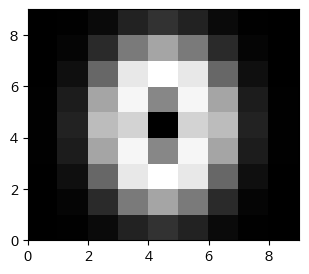

In [ ]:
#2차원 배열을 컬러맵(color map)을 사용하여 시각화하기
plt.figure(figsize=(3.5, 3))
plt.gray()  #plt.pink(), plt.jet(), plt.bone()
plt.pcolor(y)
# plt.colorbar()
plt.show()

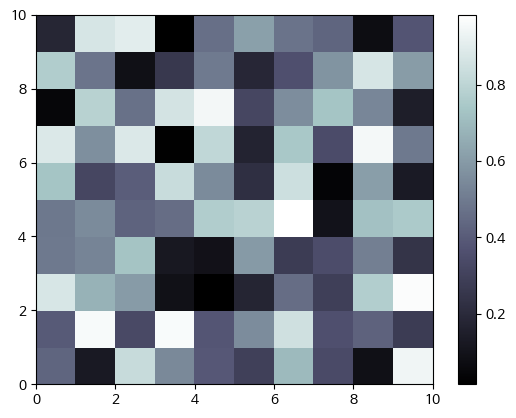

In [ ]:
# 랜덤한 2차원 배열 생성 시각화
data = np.random.rand(10, 10)
plt.bone()
plt.pcolor(data)
plt.colorbar()  # 컬러맵에 대한 color bar를 추가
plt.show()

* 3차원 그래프

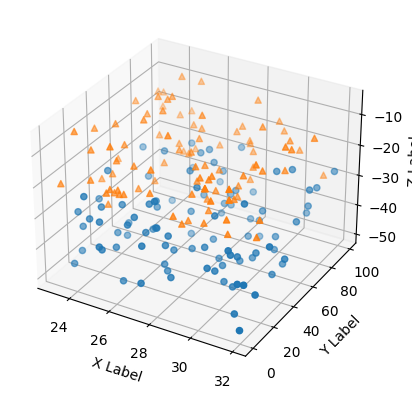

In [ ]:
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

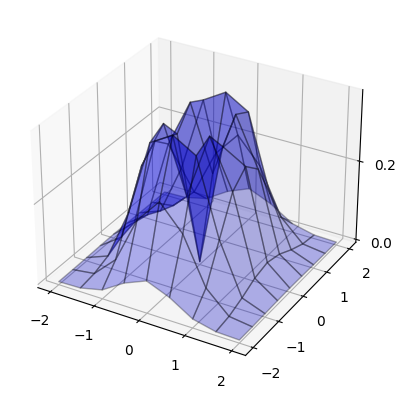

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

xx0, xx1 = np.meshgrid(x0, x1)
ax = plt.subplot(1,1,1, projection='3d')
ax.plot_surface(xx0, xx1, y, alpha=0.3,
               color='blue', edgecolor='black')
ax.set_zticks((0,0.2))
# ax.view_init(75,-95)
plt.show()

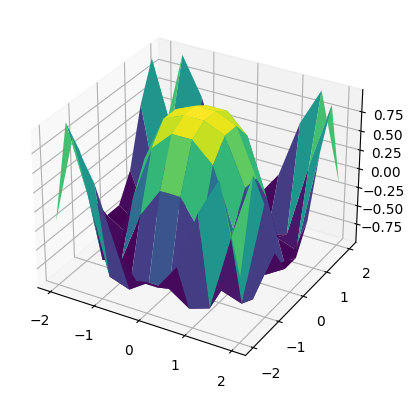

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

x = np.outer(np.linspace(-2, 2, 10), np.ones(10)) #외적
y = x.copy().T
z = np.cos(x ** 2 + y ** 2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, cmap='viridis')

plt.show()

##2. anscombe 데이터 시각화

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_names = sns.get_dataset_names()
dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
#anscombe 데이터
df = sns.load_dataset('anscombe')
#[문제] 'dataset'컬럼을 기준으로 x,y 컬럼 평균값을 구하시오.
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### `plt.subplot` 함수의 index는 1부터 시작함

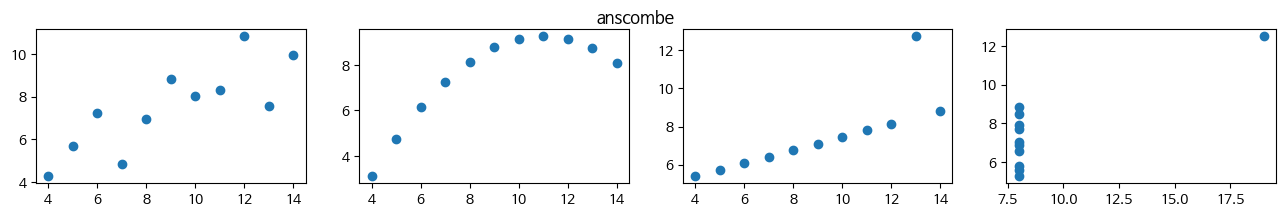

In [ ]:
#dataset을 기준으로 4개의 그래프 그리기

plt.figure(figsize=(16,2))
plt.subplot(1, 4, 1)  # plt.subplot(141) 이라고 써도 되더라
plt.scatter(df[df['dataset']=='I']['x'], df[df['dataset']=='I']['y'])
plt.subplot(1, 4, 2)
plt.scatter(df[df['dataset']=='II']['x'], df[df['dataset']=='II']['y'])
plt.subplot(1, 4, 3)
plt.scatter(df[df['dataset']=='III']['x'], df[df['dataset']=='III']['y'])
plt.subplot(1, 4, 4)
plt.scatter(df[df['dataset']=='IV']['x'], df[df['dataset']=='IV']['y'])
plt.suptitle('anscombe')
plt.show()

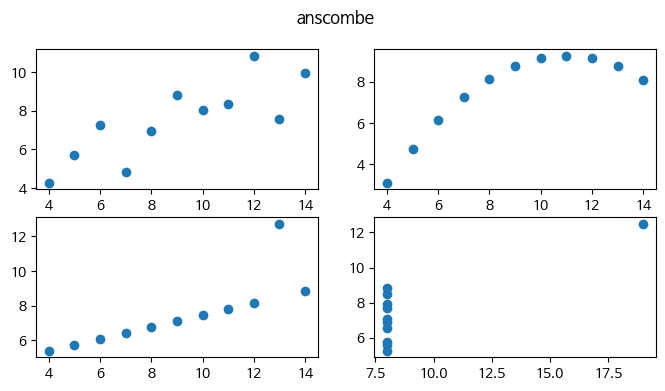

In [ ]:
#dataset을 기준으로 4개의 그래프 그리기

plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 1)  # plt.subplot(221) 이라고 써도 되더라
plt.scatter(df[df['dataset']=='I']['x'], df[df['dataset']=='I']['y'])
plt.subplot(2, 2, 2)
plt.scatter(df[df['dataset']=='II']['x'], df[df['dataset']=='II']['y'])
plt.subplot(2, 2, 3)
plt.scatter(df[df['dataset']=='III']['x'], df[df['dataset']=='III']['y'])
plt.subplot(2, 2, 4)
plt.scatter(df[df['dataset']=='IV']['x'], df[df['dataset']=='IV']['y'])
plt.suptitle('anscombe')
plt.show()

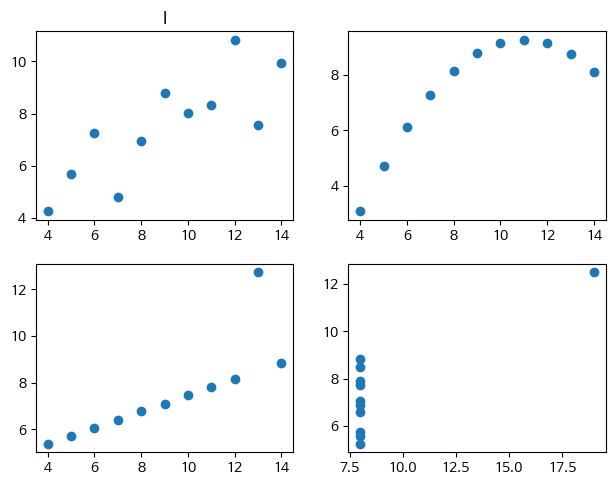

In [ ]:
#dataset을 기준으로 4개의 그래프 그리기
figure, axes = plt.subplots(2,2)
plt.tight_layout()
axes[0, 0].set_title("I")
axes[0, 0].scatter(df[df['dataset']=='I']['x'], df[df['dataset']=='I']['y'])
axes[0, 1].scatter(df[df['dataset']=='II']['x'], df[df['dataset']=='II']['y'])
axes[1, 0].scatter(df[df['dataset']=='III']['x'], df[df['dataset']=='III']['y'])
axes[1, 1].scatter(df[df['dataset']=='IV']['x'], df[df['dataset']=='IV']['y'])
plt.show()

##3. tips 데이터 시각화

In [ ]:
df= sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#day, sex 컬럼을 기준으로 중간값 median() 함수 활용
df.groupby(['day','sex'])['tip'].median()

day   sex   
Thur  Male      2.530
      Female    2.005
Fri   Male      2.600
      Female    3.000
Sat   Male      3.000
      Female    2.625
Sun   Male      3.085
      Female    3.500
Name: tip, dtype: float64

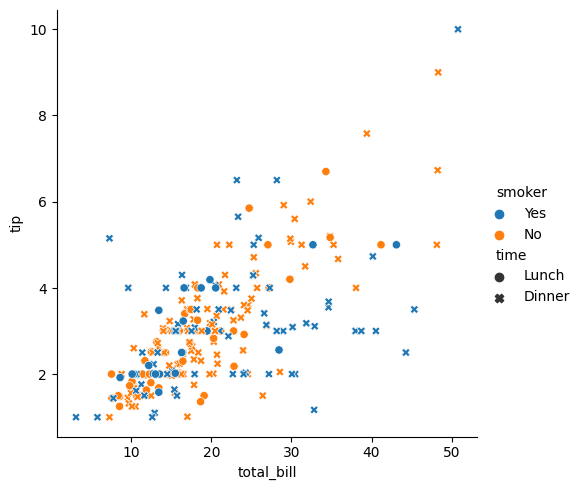

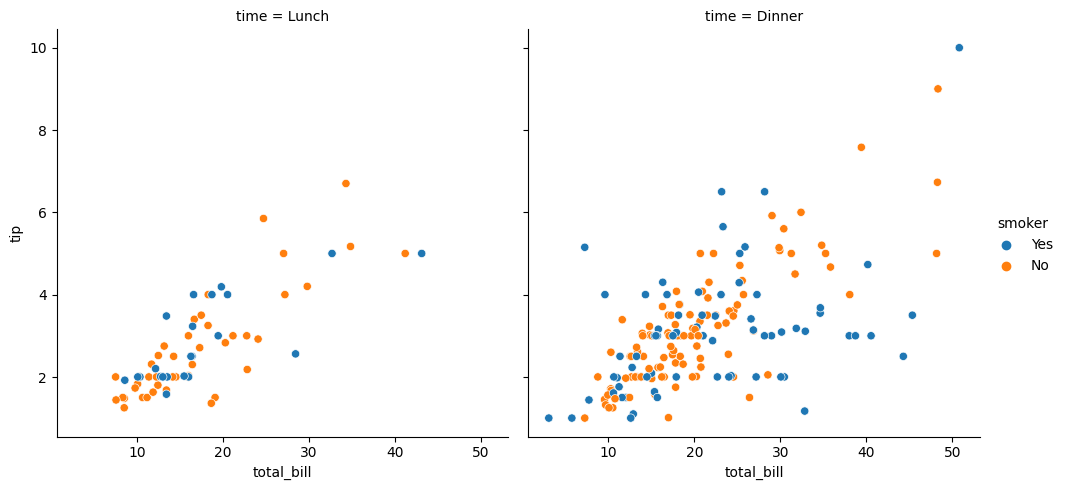

In [ ]:
#기본은 scatterplot
# sns.relplot(x='total_bill', y='tip', data=df)
#데이터셋에서 흡연 여부에 따른 팁의 관계를 다른 색상으로, 식사 시간에 따른 팁의 관계를 다른 마커 스타일로 나타냄
sns.relplot(x='total_bill', y='tip', hue='smoker', style='time', data=df)
#또한, col과 row 매개변수를 사용하여 여러 패싯에 데이터를 분할하고 그리드 레이아웃을 만들 수 있음
sns.relplot(x='total_bill', y='tip', hue='smoker', col='time', data=df)

<Axes: xlabel='total_bill', ylabel='tip'>

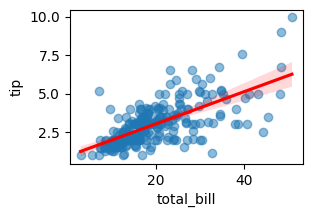

In [ ]:
plt.figure(figsize=(3,2))
sns.regplot(x="total_bill", y="tip", data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})

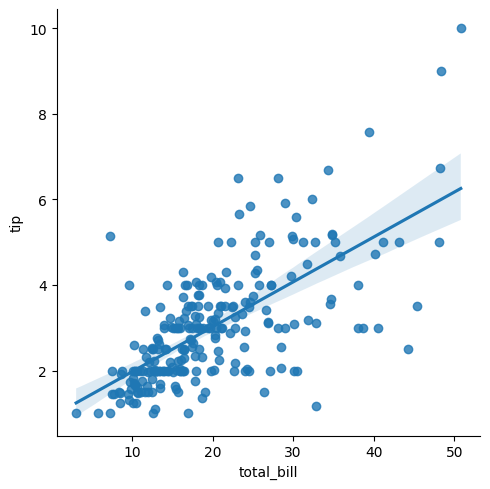

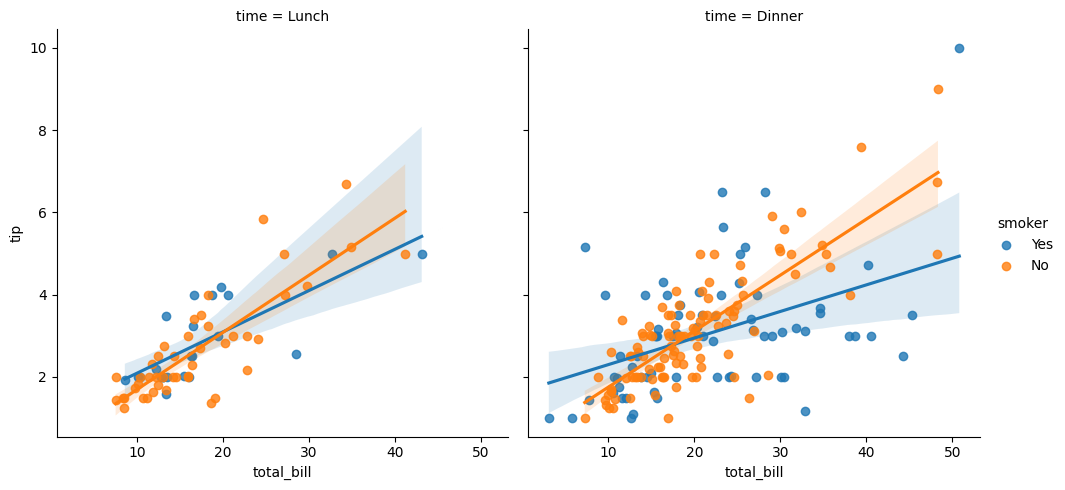

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=df)
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=df)

In [ ]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [ ]:
#요일별 이용횟수
day_df = pd.DataFrame(df['day'].value_counts())
day_df

,day
Sat,87
Sun,76
Thur,62
Fri,19


In [ ]:
day_df = day_df.reset_index()
day_df

,index,day
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


In [ ]:
day_df.columns = ['day','count']
day_df

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


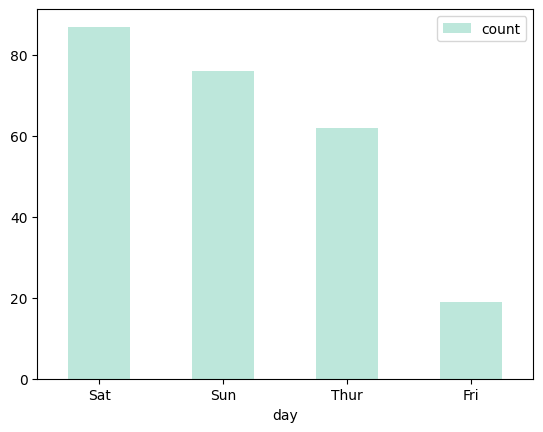

In [ ]:
day_df.plot(kind='bar',x='day',y='count',colormap='icefire')
plt.xticks(rotation=0)
plt.show()

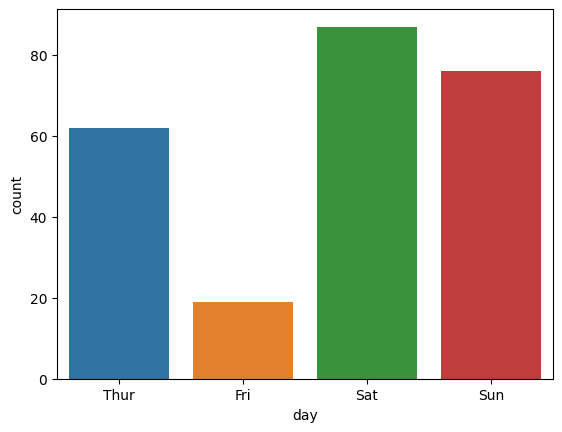

In [ ]:
sns.barplot(x='day',y='count',data=day_df)
plt.show()

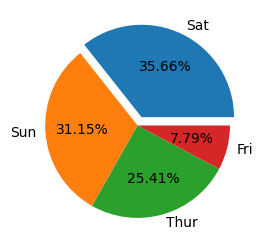

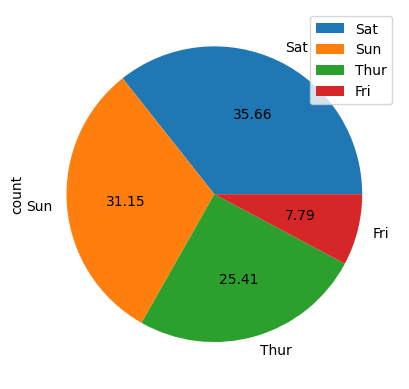

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(day_df['count'],labels=day_df['day'],autopct='%.2f%%',explode=[0.1,0,0,0])
plt.show()
day_df.plot(kind='pie', y='count',labels=day_df['day'],autopct='%.2f')
plt.show()

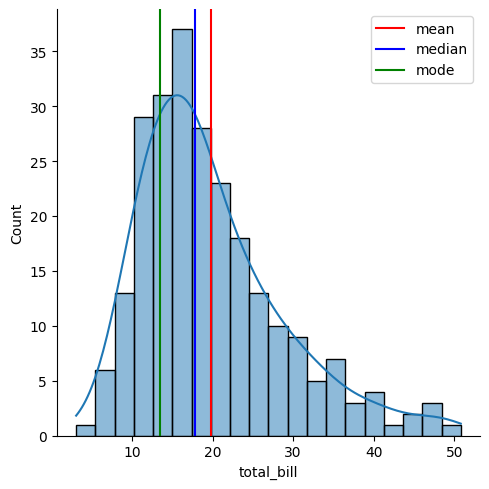

In [ ]:
a =df['total_bill']
mean=a.mean()
median=np.median(a)
mode=a.mode()

sns.displot(a, kde=True, bins=20)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

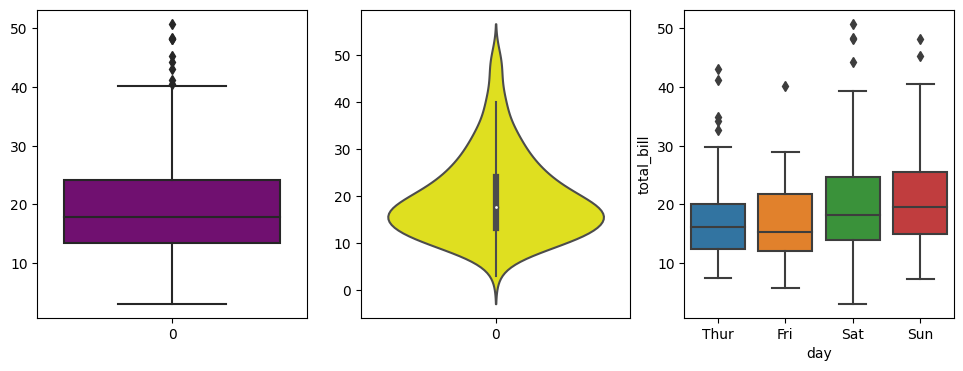

In [ ]:
plt.figure(1, figsize=(16,4))
plt.subplot(141)
sns.boxplot(a,color='Purple')
plt.subplot(142)
sns.violinplot(a,color='Yellow')
plt.subplot(143)
sns.boxplot(x='day',y='total_bill',data=df)
plt.show()

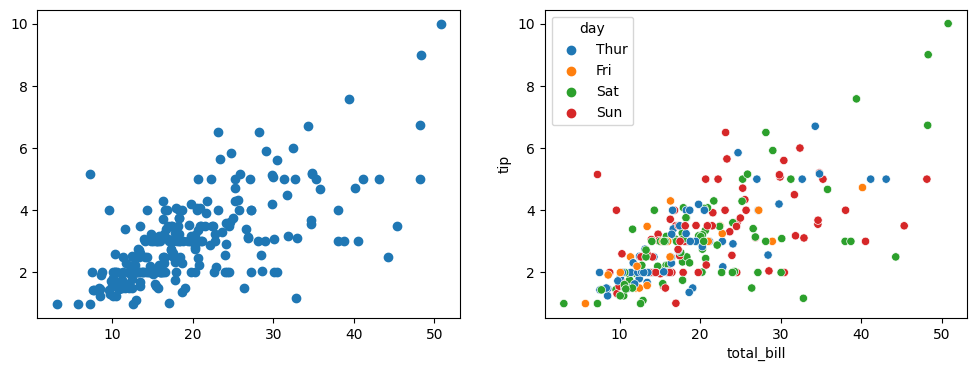

In [ ]:
plt.figure(1, figsize=(12,4))
plt.subplot(121)
plt.scatter(df['total_bill'],df['tip'])
plt.subplot(122)
sns.scatterplot(x='total_bill',y='tip',data=df,hue='day')
plt.show()

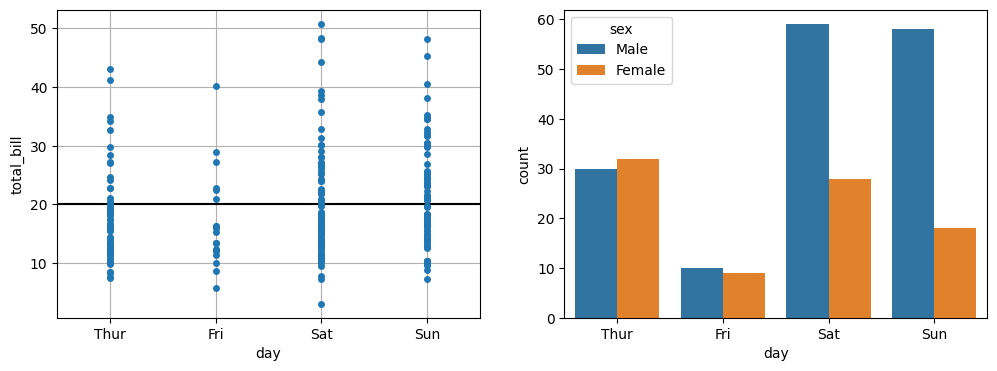

In [ ]:
plt.figure(1, figsize=(12,4))
plt.subplot(121)
sns.stripplot(x='day',y='total_bill',data=df,jitter=False)
plt.grid()
plt.axhline(20,color='black')
plt.subplot(122)
sns.countplot(x='day',data=df,hue='sex')
plt.show()

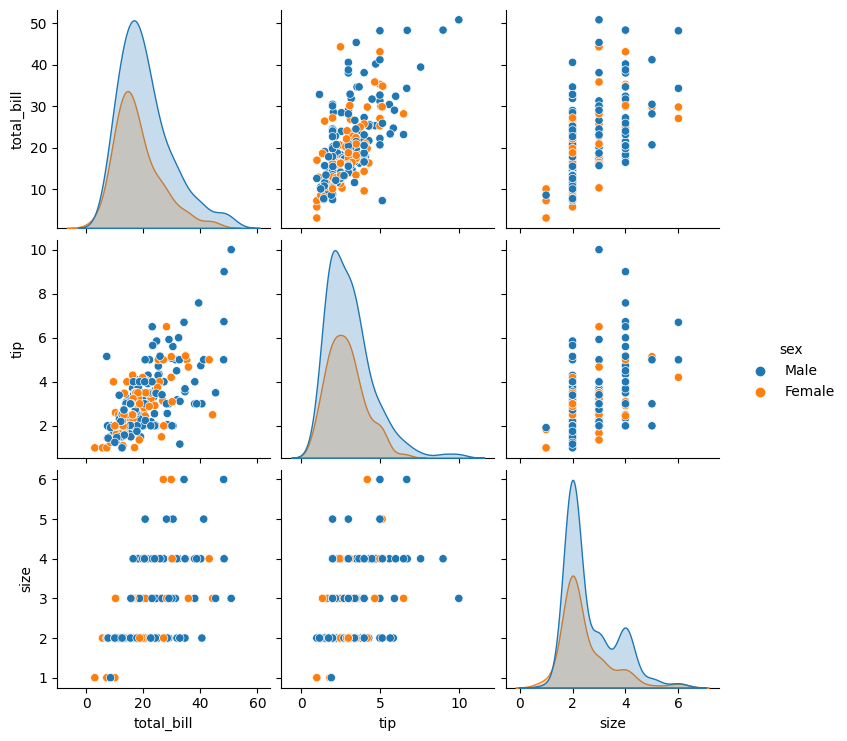

In [ ]:
sns.pairplot(data=df,hue='sex')
plt.show()

* sns.FacetGrid(tips, col='time', row='smoker')
*tips 데이터셋을 사용
* 열 방향으로 'time' 변수를, 행 방향으로 'smoker' 변수를 기준으로 그리드 생성
* g.map(plt.hist, 'total_bill') 각 패싯에 'total_bill'에 대한 히스토그램 그림  
* 결과적으로 식사 시간('time')과 흡연 여부('smoker')에 따른 청구서 총액('total_bill')의 분포를 표현함.
* FacetGrid는 map 함수 : 그리드의 각 패싯에 여러 가지 시각화를 적용 가능
* 이를 통해 데이터의 다양한 측면을 빠르고 효과적으로 탐색하고 비교 가능

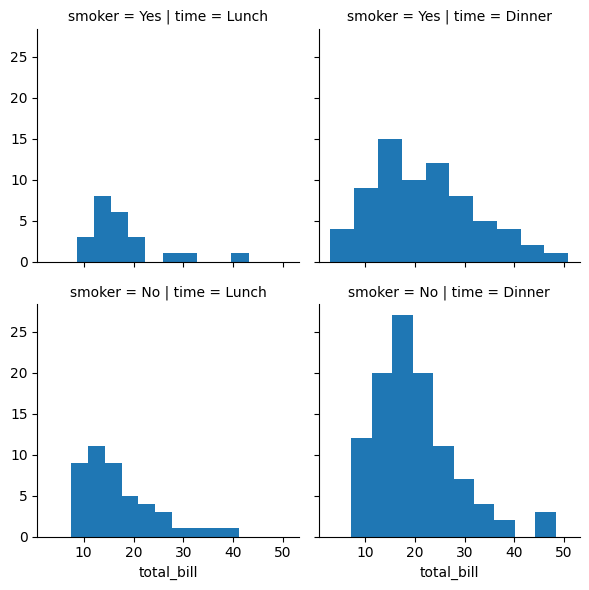

In [ ]:
g = sns.FacetGrid(df, col='time', row='smoker')
g = g.map(plt.hist, 'total_bill')

##4. titanic 데이터 시각화

In [ ]:
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

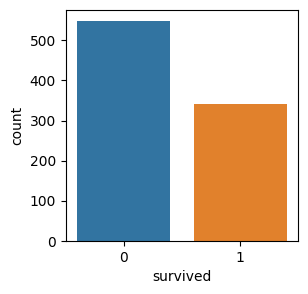

In [ ]:
plt.figure(figsize=(3,3))
#생존 여부에 따른 수치 확인
sns.countplot(data=df, x='survived')

<Axes: xlabel='class', ylabel='count'>

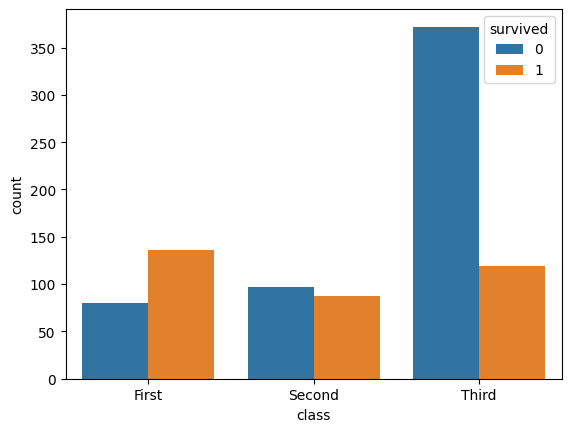

In [ ]:
#생존 여부에 따른 선실 등급 분석
sns.countplot(data=df, x='class', hue='survived')

In [ ]:
#도수분포표, 교차표로 표시
pd.crosstab(df['class'], df['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
class,,,
First,80,136,216
Second,97,87,184
Third,372,119,491
All,549,342,891


In [ ]:
pd.crosstab([df['who'],df['class']], df['survived'], margins=True).style.background_gradient(cmap='Set3')

<Axes: xlabel='survived', ylabel='age'>

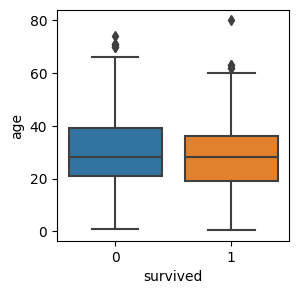

In [ ]:
plt.figure(figsize=(3,3))
#생존자 여부에 따른 나이 분포
sns.boxplot(x='survived', y='age', data=df )

##### cmap

* cmap 파라미터는 Matplotlib에서 제공하는 색상 맵(colormap)의 종류
* 데이터의 범위를 색상의 범위로 매핑하여 정보를 시각적으로 전달함.
* Sequential colormaps: 단일 색상의 색조를 사용하며, 흰색에서 시작해서 더 진한 색깔로 끝남. 이는 데이터가 상대적으로 낮은 값에서 높은 값으로 변할 때 사용됨. 예: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'.

* Diverging colormaps: 두 가지 다른 색상이 중간에서 만나는 경우에 사용, 데이터가 평균이나 중앙 값으로부터 양 또는 음의 방향으로 변할 때 사용됨. 예: 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'.

* Cyclic colormaps: 두 가지 색상이 시작점에서 끝점까지 순환하는 경우에 사용됨. 이는 각도 데이터와 같이 순환적인 특성을 가진 데이터에 사용. 예: 'twilight', 'twilight_shifted', 'hsv'.

* Qualitative colormaps: 일반적으로 카테고리 데이터를 표현할 때 사용됨. 예: 'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'.

* Miscellaneous colormaps:  일반적으로 특정 데이터 세트에 특화된 다양한 색상 맵들을 포함하고 있음. 예: 'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'.

* 색상 맵의 선택은 데이터의 종류와 시각화의 목적에 따라 달라짐.

#### 연습하기

<Axes: xlabel='embark_town', ylabel='count'>

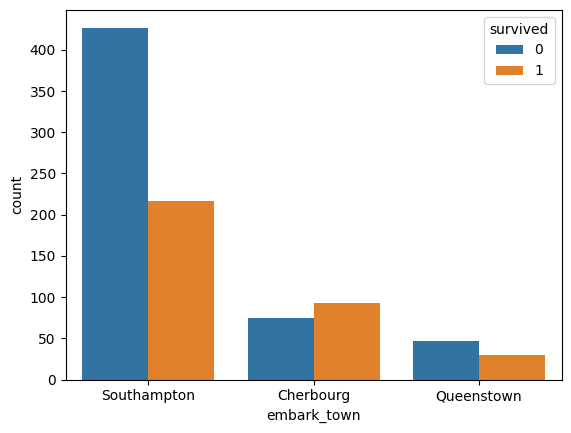

In [ ]:
#승선항(embark_town)에 따른 생존 여부 시각화
sns.countplot(data=df, x='embark_town', hue='survived')

<Axes: xlabel='who', ylabel='count'>

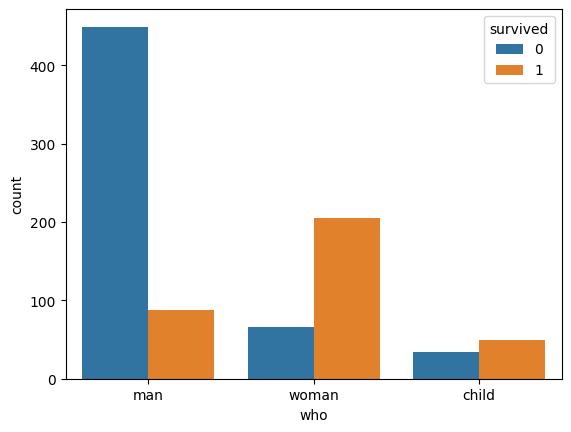

In [ ]:
#성별(who)에 따른 생존 여부 시각화
sns.countplot(data=df, x='who', hue='survived')

<Axes: xlabel='survived', ylabel='fare'>

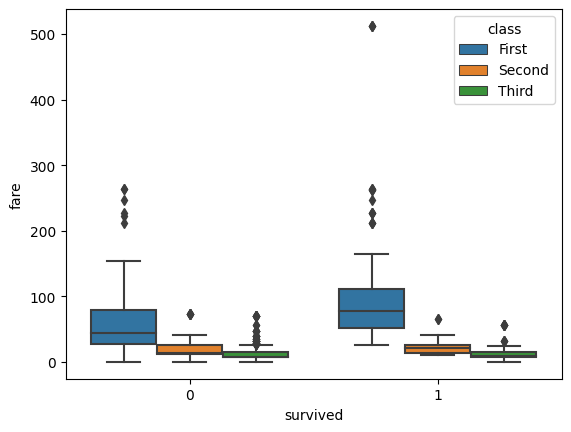

In [ ]:
#생존자(survived) 여부와 등급(class)에 따른 fare 분포
sns.boxplot(x='survived', y='fare', hue='class', data=df )

##5. iris 데이터 시각화

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: ylabel='Density'>

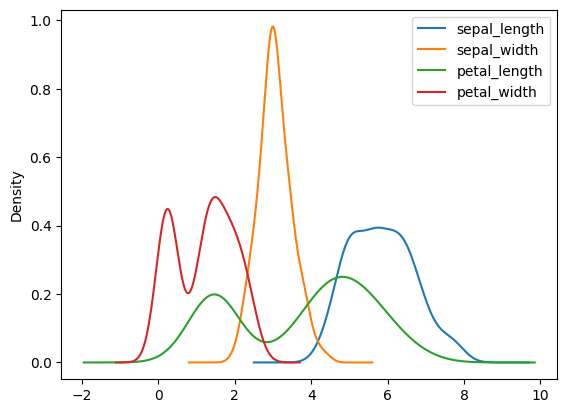

In [ ]:
#각 속성별 커널 밀도 추정치(각 변수의 분포) 시각화
#KDE 그래프는 데이터의 분포를 이해하는 데 유용하며 이상탐지나 데이터 전처리 전략 설정에 도움이 될 수 있음.
df.plot(kind='kde')

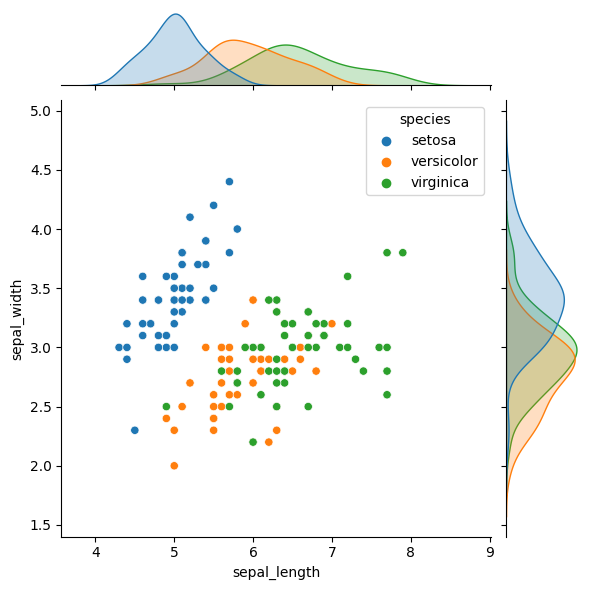

In [ ]:
#joinplot은 두 변수 간의 관계와 각 변수의 분포를 한 번에 볼 수 있음.
sns.jointplot(x='sepal_length',y='sepal_width',data=df, hue='species')

##6. flights 데이터 시각화

In [ ]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
#피벗 테이블 형태로 보기
df.pivot('month','year','passengers')

<ipython-input-251-04317fd92229>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df.pivot('month','year','passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<ipython-input-252-865a87b9e427>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot('month','year','passengers'), annot=True, fmt='d')


<Axes: xlabel='year', ylabel='month'>

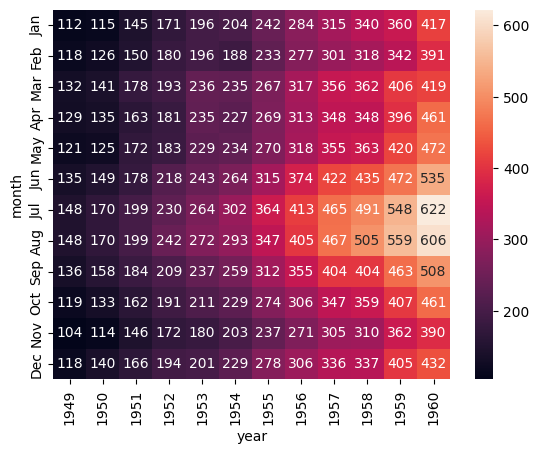

In [ ]:
sns.heatmap(df.pivot('month','year','passengers'), annot=True, fmt='d')

<Axes: xlabel='year', ylabel='passengers'>

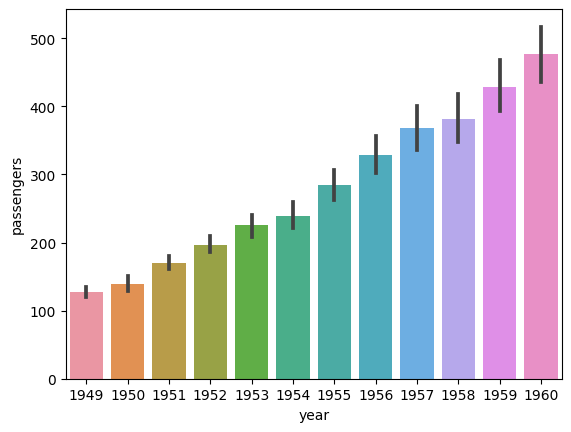

In [ ]:
sns.barplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

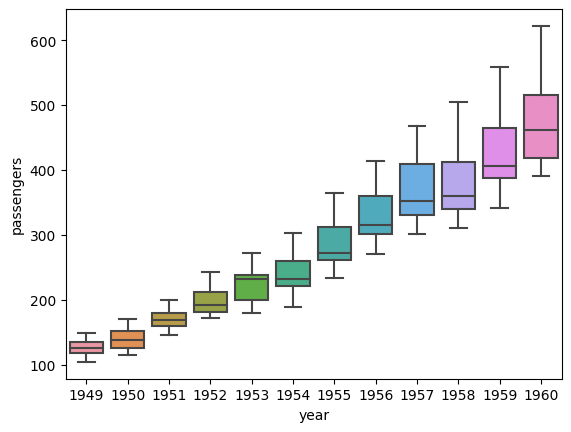

In [ ]:
sns.boxplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

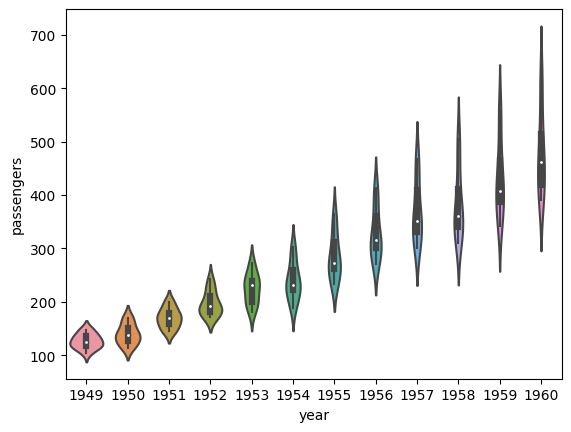

In [ ]:
sns.violinplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

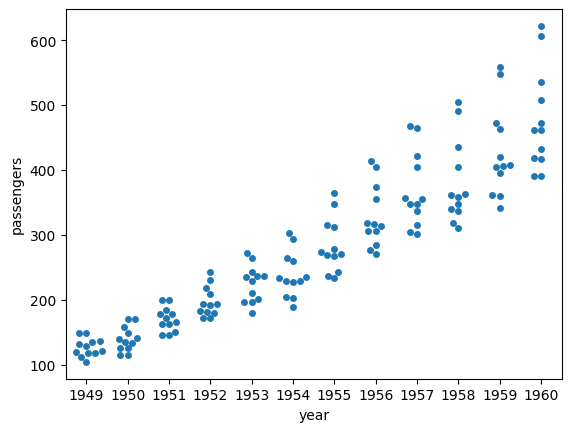

In [ ]:
sns.swarmplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

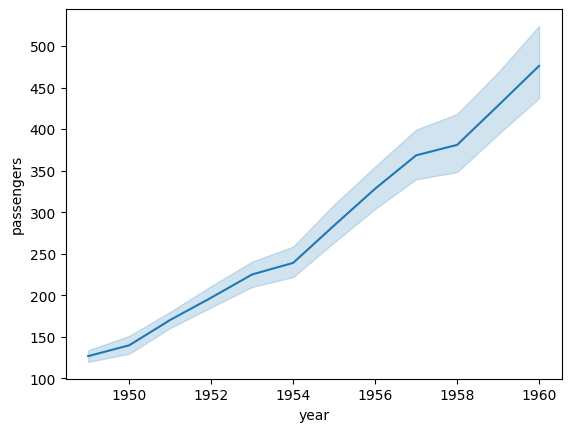

In [ ]:
sns.lineplot(data=df, x="year", y="passengers")

<Axes: xlabel='year', ylabel='passengers'>

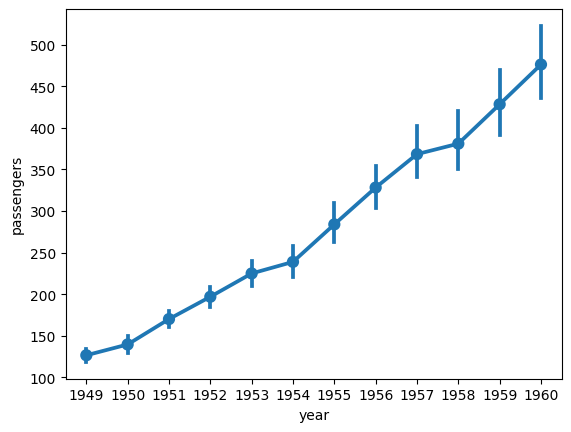

In [ ]:
sns.pointplot(data=df, x="year", y="passengers")

#**PART 3** 데이터 분석 실습

## 1. 자전거 대여 데이터 분석 실습[문제]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

####**문제 1** 데이터 불러온 다음, 데이터 크기 및 컬럼 정보 확인하기

In [ ]:
#bike_train.csv 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/MLClass_류현승/data/bike_train.csv")
#앞에서부터 5행 출력하기
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#데이터 행,열 크기 출력
train.shape
#데이터 프레임 정보 출력하기
train.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

####**문제 2** 'datetime' 컬럼을 이용하여 'date','year','month','day','hour','minute','scond' 컬럼을 새로 만드시오.

In [ ]:
#코드
# 2011-01-01 00:00:00
import re

train['date'] = train['datetime'].apply(lambda x: x.split(' ')[0])
train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split(' ')[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split(' ')[1].split(':')[2])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00


####**문제 3** 다음 코드를 활용하여 요일명을 표현하는 'weekday' 컬럼을 추가하기오.

In [ ]:
#날짜로 요일 알아내기
from datetime import datetime
import calendar
#월요일 : 0 화요일 : 1 수요일 : 2 목요일 : 3 금요일 : 4 토요일 : 5 일요일 : 6
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# datetime.strptime('2011-01-01', '%Y-%m-%d').weekday()

train['weekday'] = train['date'].apply(lambda x: weekday_names[datetime.strptime(x, '%Y-%m-%d').weekday()])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


In [ ]:
train['count'].max()

977

####**문제 4** 'count' 컬럼 값으로 다음과 같이 그래프를 출력하시오.

<Axes: xlabel='count', ylabel='Count'>

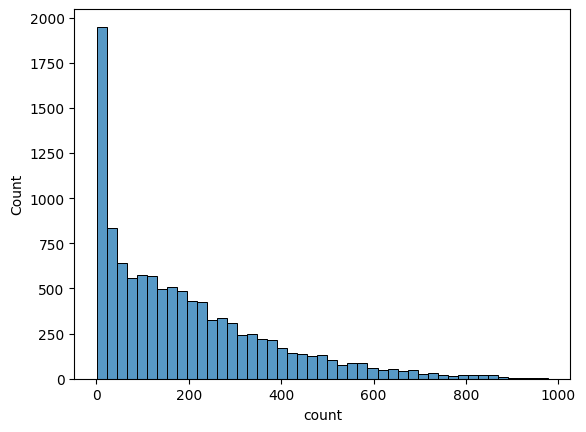

In [ ]:
sns.histplot(data=train['count'])

####**문제 5** 다음과 같이 barplot을 출력하시오.

<Axes: xlabel='hour', ylabel='count'>

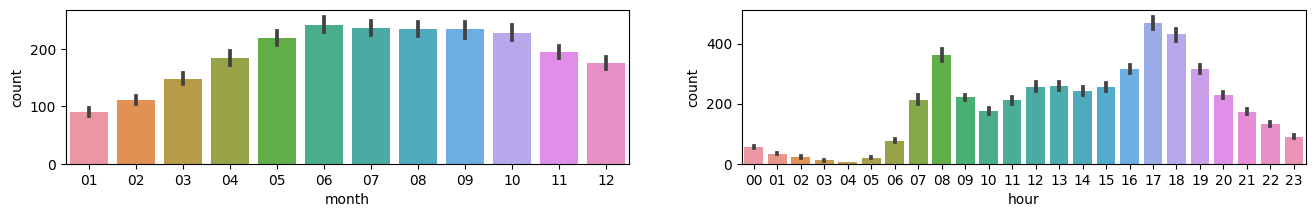

In [ ]:
#코드
plt.figure(figsize=(16, 2))
plt.subplot(1, 2, 1)
sns.barplot(data=train, x='month', y='count')
plt.subplot(1, 2, 2)
sns.barplot(data=train, x='hour', y='count')

####**문제 6** 다음과 같이 boxplot을 그리시오

<Axes: xlabel='workingday', ylabel='count'>

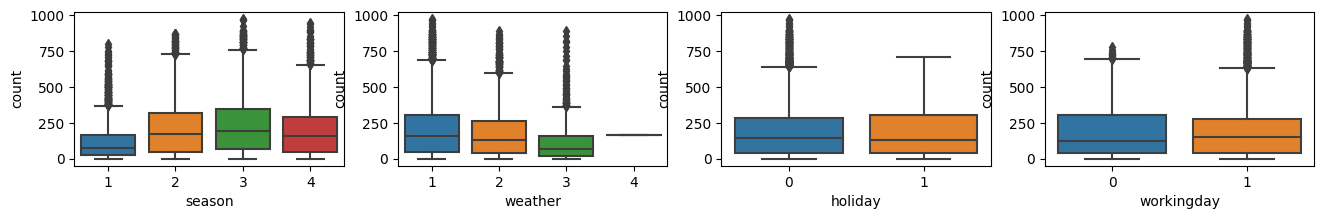

In [ ]:
plt.figure(figsize=(16,2))
plt.subplot(1, 4, 1)
sns.boxplot(data=train, x='season', y='count')
plt.subplot(1, 4, 2)
sns.boxplot(data=train, x='weather', y='count')
plt.subplot(1, 4, 3)
sns.boxplot(data=train, x='holiday', y='count')
plt.subplot(1, 4, 4)
sns.boxplot(data=train, x='workingday', y='count')

####**문제 7** 다음과 같이 pointplot을 그리시오.

<Axes: xlabel='hour', ylabel='count'>

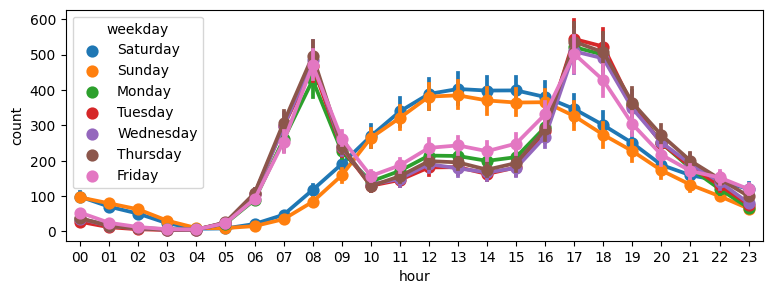

In [ ]:
plt.figure(figsize=(9,3))
sns.pointplot(data=train, x='hour', y='count', hue='weekday')

####**문제 8** 다음과 같이 regplot을 그리시오.

<Axes: xlabel='temp', ylabel='count'>

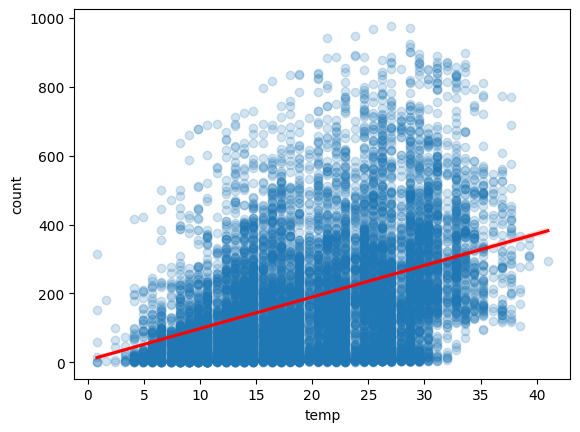

In [ ]:
sns.regplot(x='temp', y='count', data=train, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})

####**문제 9** 'temp','atemp','humidity','windspeed','count' 속성 간의 상관계수를 다음과 같이 출력하시오.

In [ ]:
#코드
corr = train[['temp',	'atemp', 'humidity'	,'windspeed',	'count']].corr()
# corr = corr.reset_index()
corr

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


In [ ]:
corr.pivot(index='index', columns='temp')

atemp                                          humidity  \
temp      -0.064949 -0.017852  0.394454  0.984948  1.000000 -0.064949   
index                                                                   
atemp           NaN       NaN       NaN       1.0       NaN       NaN   
count           NaN       NaN  0.389784       NaN       NaN       NaN   
humidity  -0.043536       NaN       NaN       NaN       NaN       1.0   
temp            NaN       NaN       NaN       NaN  0.984948       NaN   
windspeed       NaN -0.057473       NaN       NaN       NaN       NaN   

                                                  windspeed            \
temp      -0.017852  0.394454  0.984948  1.000000 -0.064949 -0.017852   
index                                                                   
atemp           NaN       NaN -0.043536       NaN       NaN       NaN   
count           NaN -0.317371       NaN       NaN       NaN       NaN   
humidity        NaN       NaN       NaN       NaN -0.318607       NaN   
temp            NaN       NaN       NaN -0.064949       NaN       NaN   
windspeed -0.318607       NaN       NaN       NaN       NaN       1.0   

                                            count                      \
temp       0.394454  0.984948  1.000000 -0.064949 -0.017852  0.394454   
index                                                                   
atemp           NaN -0.057473       NaN       NaN       NaN       NaN   
count      0.101369       NaN       NaN       NaN       NaN       1.0   
humidity        NaN       NaN       NaN -0.317371       NaN       NaN   
temp            NaN       NaN -0.017852       NaN       NaN       NaN   
windspeed       NaN       NaN       NaN       NaN  0.101369       NaN   

                               
temp       0.984948  1.000000  
index                          
atemp      0.389784       NaN  
count           NaN       NaN  
humidity        NaN       NaN  
temp            NaN  0.394454  
windspeed       NaN       NaN

####**문제 10** 9번에서 추출한 상관계수 표를 이용하여 heatmap을 그리시오.

<Axes: >

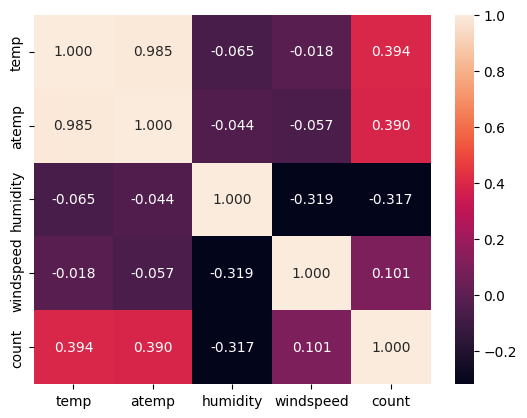

In [ ]:
#코드
sns.heatmap(corr, annot=True, fmt='.3f')

####**문제 11** 다음 리스트로 주어진 컬럼을 제거하시오.

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']
#코드
train.drop(columns=drop_features, inplace=True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,01,00,00,00,Saturday
1,1,0,0,1,9.02,13.635,80,40,2011,01,01,00,00,Saturday
2,1,0,0,1,9.02,13.635,80,32,2011,01,02,00,00,Saturday
3,1,0,0,1,9.84,14.395,75,13,2011,01,03,00,00,Saturday
4,1,0,0,1,9.84,14.395,75,1,2011,01,04,00,00,Saturday


####**문제 12** 다음 리스트를 이용하여 'weekday'컬럼을 수치형 자료로 변환하기

In [ ]:
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
train['weekday'] = train['weekday'].apply(lambda x: weekday_names.index(x))
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,day,hour,minute,second,weekday
0,1,0,0,1,9.84,14.395,81,16,2011,01,00,00,00,5
1,1,0,0,1,9.02,13.635,80,40,2011,01,01,00,00,5
2,1,0,0,1,9.02,13.635,80,32,2011,01,02,00,00,5
3,1,0,0,1,9.84,14.395,75,13,2011,01,03,00,00,5
4,1,0,0,1,9.84,14.395,75,1,2011,01,04,00,00,5


####**문제 13** train 데이터 프레임을 trainX('count'를 제외한 모든 컬럼 데이터)와 trainY('count') 컬럼 데이터로 분리하시오.

In [ ]:
trainY = train['count']
trainX = train[train.columns.difference(['count'])]

In [ ]:
trainX.to_numpy()

array([[14.395, '01', 0, ..., 5, 0, '2011'],
       [13.635, '01', 0, ..., 5, 0, '2011'],
       [13.635, '01', 0, ..., 5, 0, '2011'],
       ...,
       [15.91, '19', 0, ..., 2, 1, '2012'],
       [17.425, '19', 0, ..., 2, 1, '2012'],
       [16.665, '19', 0, ..., 2, 1, '2012']], dtype=object)

In [ ]:
trainY.to_numpy()

array([ 16,  40,  32, ..., 168, 129,  88])

## 2. 다음 제시된 데이터셋 중 1개를 골라 실습하여 제출하기


*  car_crashes
*  diamonds
*  mpg
*  penguins
*  iris
*  titanic
*  tips
*  **wineQT.csv**
*  **heart.csv**
*  **grades.tab**












In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_names = sns.get_dataset_names()
dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('penguins')
df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
